# 1. Define the layout for the padlock:
-> 1. Input the umber of content tiles you want to have (recommended 1, 4, 9; will be reduced to next lower square number later)

--> 2. Input the number of randomly colored frame lines (be careful: the more frames the less content space)

---> 3. Input the line size (the bigger the number the bolder the frame gets)

In [38]:
tiles = int(input("Enter number of tiles: "))
frames = int(input("Enter number of frames: "))
lines = int(input("Enter size of lines: "))

print(f"Ok., I will create {tiles} tile(s), each having {frames} frame(s) with a line size of {lines}.")

Ok., I will create 9 tile(s), each having 12 frame(s) with a line size of 6.


# 2. Showcase the layout based on selected input parameters

This is how the template looks like:


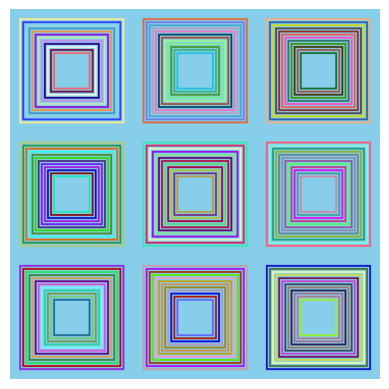

In [39]:
import math
import numpy as np
import random as rnd
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageOps

# Design variables
tile_number = tiles                    # Will be adjusted to lower square number (1=big, 4=medium, 9=small size)
frame_number = frames                    # Must be any number between 1 and 12
frame_line_width = lines                  # Recommendation of line size is 6 (the bigger the bolder)

# frame_object = Image.open('/Downloads/DIT_NFT_Logo.png')   
frame_object = None                

tiles_per_row = math.floor(math.sqrt(tile_number))  # Calculate next smaller squared layout
tiles_per_column = tiles_per_row                    # Only squared wallpapers

# Create a basic tile image using Pillow
tile_size = (400, 400)
tile = Image.new("RGB", tile_size, "red")           # Initially a false color

# Global variable
hash_input = ""                                     # Initialize, reset or empty hash input

# Design wallpaper by inner pattrern
def assemble_wallpaper(tile, rows=tiles_per_row, cols=tiles_per_column):
    global hash_input
     
    tile = Image.new("RGB", (tile_size[0] * cols, tile_size[1] * rows), "skyblue")

    hash_input = ""                                 # Initialize, reset or empty hash input

    for i in range(rows):
        for j in range(cols):
  
            # Patterm dimensions
            width, height = 300, 300                # Pattern square room
            nested_depth = frame_number             # Number of nested squares
            distance = 10                           # Distance between squares

            # Sizing of square pattern
            width, height = 360, 360
            pattern = Image.new('RGB', (width, height), 'skyblue')
            draw = ImageDraw.Draw(pattern)

            # Drawing nested rectangles
            for x in range(nested_depth):

                # Position and size of outer rectangle
                if x == 0:
                    start_x, start_y = distance, distance
                    rect_width = 340
                    rect_height = 340

                # Defining random RGB color per square
                red_value = round(rnd.random()*255)
                green_value = round(rnd.random()*255)
                blue_value = round(rnd.random()*255)
                random_color = (red_value, green_value, blue_value)
                            
                hash_input = hash_input + str(red_value) + str(green_value) + str(blue_value)
        
                # Draw frame
                draw.rectangle(
                    [start_x, start_y, start_x + rect_width, start_y + rect_height], 
                    outline=(random_color),
                    width=frame_line_width)
    
                # Adjust position an size for next smaller square
                start_x += distance
                start_y += distance
                rect_width -= 2 * distance
                rect_height -= 2 * distance

                # Fit in frame content
                if x == nested_depth:
                    pattern.paste(frame_object)
                    draw = ImageDraw.Draw(pattern)
            
            tile.paste(pattern, (j * tile_size[0] + (2*distance), i * tile_size[1] + (2*distance)))  
            draw = ImageDraw.Draw(tile)

    return tile

# Generate and display wallpaper pattern

print(f"This is how the template looks like:")

wallpaper = assemble_wallpaper(tile)
plt.imshow(wallpaper)
plt.axis("off")
plt.show()



## 3. Calculate a unique hash for NFT:
-> The hash input is dertermined by concatenating all single and randomly defined (RGB) color values

In [40]:
import hashlib

print(f"These are the randomly created RGB values concatenated tile by tile and frame by frame:")
print(hash_input)
print()

# Convert hash string into byte format UTF-8
hash_bytes = hash_input.encode('utf-8')

# Calcualation of hash (first choice is MD5 to keep it simple, otherwise SHA-256 could be used too)
NFT_hash = hashlib.md5(hash_bytes)

# Output of hash value as hexadecimal string
NFT_hex = NFT_hash.hexdigest()

# Short for SHA-256: NFT_hex = hashlib.sha256(hash_bytes.encode('utf-8')).hexdigest()

print (f"The following key was calculated as hash over all coloours in order to make your NFT unique for registration:")
print(NFT_hex)

These are the randomly created RGB values concatenated tile by tile and frame by frame:
2462341534263250134214226651522022361496914215215191233182198142238433135234247235110177023510610722710453111124235771652051841601962421141931719716280491502461531262411266815435551831263419422424417312349981702092201282708114544362369185246811924511911064147137155715984752511248178202117421496721910811562492317113944392232754612711828244173162301711195129171635230188532341842164094228246196148142331362271421025981671660892191131680621641996112345122181159622548911613324622529162123142180419813514313814217614687156802501051965713321715239671591582061351711404022318283352269061131592221557710721342228021912424225430216161117157721212001192710715319415816917711238156589932304246154208193161172121418315713519183151184109222176241095106247122019567112612312481722012236711716961927021157719015312110237308416711214016613013915324046

The following key was calculated as hash over all coloours in order to m

# 4a - Option 1:  Register NFT hash code in a JSON database

In [41]:
import json
import os
import time
from datetime import datetime

def create_or_update_database(db_filename, nft_data, tiles, frames, line):
    # Check if the database file exists
    if os.path.exists(db_filename):
        # Open the existing database
        with open(db_filename, 'r') as file:
            db = json.load(file)
    else:
        # If the database doesn't exist, create an empty list
        db = []

    # Check if the NFT already exists in the database (primary key check)
    for entry in db:
        if entry['NFT_hex'] == NFT_hex:
            raise ValueError("NFT already registered, please try another!")
        
     # Get the current timestamp in human-readable format
    timestamp = time.time()
    readable_timestamp = datetime.fromtimestamp(timestamp).strftime('%Y-%m-%d %H:%M:%S')

    # Create a new entry with the required fields
    new_entry = {
        "NFT_hex": NFT_hex,
        "No. of Tiles": tiles,
        "No. of Frames": frames,
        "Line strength": lines,
        "Registered": readable_timestamp
    }

    # Add the new entry to the database
    db.append(new_entry)

    # Save the updated database back to the file
    with open(db_filename, 'w') as file:
        json.dump(db, file, indent=4)

    print(f"NFT with hash {NFT_hex} has been added successfully on {readable_timestamp}")

# Try to register new NFT:
try:
    create_or_update_database("DIY_NFT_Padlock_Registry.json", NFT_hex, tiles, frames, lines)
except ValueError as e:
    print(e)


NFT with hash 15a4e35de15a0dda73e4d990e13fe6c2 has been added successfully on 2025-02-01 19:58:48


# 4b - Option 2:  Register NFT hash code in a SQL database

In [42]:
import sqlite3
import time
from datetime import datetime

def create_or_update_database(db_filename, NFT_hex, tiles, frames, lines):
    # Connect to the SQLite database (or create it if it doesn't exist)
    conn = sqlite3.connect(db_filename)
    cursor = conn.cursor()

    # Create the table if it doesn't exist
    cursor.execute('''
    CREATE TABLE IF NOT EXISTS nft_registry (
        NFT_hex TEXT PRIMARY KEY,
        No_of_Tiles INTEGER,
        No_of_Frames INTEGER,
        Line_strength INTEGER,
        Registered TEXT
    )
    ''')

    # Check if the NFT already exists in the database (primary key check)
    cursor.execute('SELECT * FROM nft_registry WHERE NFT_hex = ?', (NFT_hex,))
    existing_nft = cursor.fetchone()

    if existing_nft:
        raise ValueError("NFT already registered, please try another!")

    # Get the current timestamp in human-readable format
    timestamp = time.time()
    readable_timestamp = datetime.fromtimestamp(timestamp).strftime('%Y-%m-%d %H:%M:%S')

    # Insert the new NFT record into the database
    cursor.execute('''
    INSERT INTO nft_registry (NFT_hex, No_of_Tiles, No_of_Frames, Line_strength, Registered)
    VALUES (?, ?, ?, ?, ?)
    ''', (NFT_hex, tiles, frames, lines, readable_timestamp))

    # Commit the changes and close the connection
    conn.commit()
    conn.close()

    print(f"NFT with hash {NFT_hex} has been added successfully on {readable_timestamp}")

# Example usage:
try:
    create_or_update_database("DIY_NFT_Padlock_Registry.db", NFT_hex, tiles, frames, lines)
except ValueError as e:
    print(e)


NFT with hash 15a4e35de15a0dda73e4d990e13fe6c2 has been added successfully on 2025-02-01 19:58:55
